<a href="https://colab.research.google.com/github/vivek11416/tensorflow/blob/master/TF_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import numpy as np
rng = np.random

In [2]:
learning_rate = 0.01
training_steps = 1000
display_steps = 50

In [3]:
X = np.array([6.1101,5.5277,8.5186,7.0032,5.8598,8.3829,7.4764,8.5781,6.4862,5.0546,5.7107,14.164,5.734,8.4084,5.6407,5.3794,6.3654,5.1301,6.4296,7.0708,6.1891,20.27,5.4901,6.3261,5.5649,18.945,12.828,10.957,13.176,22.203,5.2524,6.5894,9.2482,5.8918,8.2111,7.9334,8.0959,5.6063,12.836,6.3534,5.4069,6.8825,11.708,5.7737,7.8247,7.0931,5.0702,5.8014,11.7,5.5416,7.5402,5.3077,7.4239,7.6031,6.3328,6.3589,6.2742,5.6397,9.3102,9.4536,8.8254,5.1793,21.279,14.908,18.959,7.2182,8.2951,10.236,5.4994,20.341,10.136,7.3345,6.0062,7.2259,5.0269,6.5479,7.5386,5.0365,10.274,5.1077,5.7292,5.1884,6.3557,9.7687,6.5159,8.5172,9.1802,6.002,5.5204,5.0594,5.7077,7.6366,5.8707,5.3054,8.2934,13.394,5.4369])
Y = np.array([17.592,9.1302,13.662,11.854,6.8233,11.886,4.3483,12,6.5987,3.8166,3.2522,15.505,3.1551,7.2258,0.71618,3.5129,5.3048,0.56077,3.6518,5.3893,3.1386,21.767,4.263,5.1875,3.0825,22.638,13.501,7.0467,14.692,24.147,-1.22,5.9966,12.134,1.8495,6.5426,4.5623,4.1164,3.3928,10.117,5.4974,0.55657,3.9115,5.3854,2.4406,6.7318,1.0463,5.1337,1.844,8.0043,1.0179,6.7504,1.8396,4.2885,4.9981,1.4233,-1.4211,2.4756,4.6042,3.9624,5.4141,5.1694,-0.74279,17.929,12.054,17.054,4.8852,5.7442,7.7754,1.0173,20.992,6.6799,4.0259,1.2784,3.3411,-2.6807,0.29678,3.8845,5.7014,6.7526,2.0576,0.47953,0.20421,0.67861,7.5435,5.3436,4.2415,6.7981,0.92695,0.152,2.8214,1.8451,4.2959,7.2029,1.9869,0.14454,9.0551,0.61705])

In [15]:
# weight and Bias, initialized randomly
W = tf.Variable(rng.randn(),name="weight")
b = tf.Variable(rng.randn(),name="bias")

#linear regression mX+c
def linear_regression(x):
  return W*x +b

# mean squared error
def mean_squared(y_pred,y_true):
  return tf.reduce_mean(tf.square(y_pred-y_true))

#stochastic grad Desc optimizer
optimizer = tf.optimizers.SGD(learning_rate)

In [16]:
#Optimization process
def run_optimization():
  #gradienttape for automating differentiation
  with tf.GradientTape() as tape:
    pred = liner_regression(X)
    loss = mean_squared(pred,Y)
  #compute gradients
  gradients = tape.gradient(loss,[W,b])

  #update W and b
  optimizer.apply_gradients(zip(gradients,[W,b]))

In [17]:
# run training for given number of steps
for step in range(1,training_steps+1):
  # Run the optimization to update W and b
  run_optimization()

  if step%display_steps == 0:
    pred = linear_regression(X)
    loss = mean_squared(pred,Y)
    print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 10.096093, W: 0.941423, b: -1.391218
step: 100, loss: 9.749862, W: 0.982994, b: -1.805018
step: 150, loss: 9.508587, W: 1.017696, b: -2.150451
step: 200, loss: 9.340452, W: 1.046665, b: -2.438812
step: 250, loss: 9.223286, W: 1.070848, b: -2.679530
step: 300, loss: 9.141637, W: 1.091035, b: -2.880477
step: 350, loss: 9.084740, W: 1.107887, b: -3.048224
step: 400, loss: 9.045090, W: 1.121955, b: -3.188256
step: 450, loss: 9.017459, W: 1.133699, b: -3.305152
step: 500, loss: 8.998205, W: 1.143502, b: -3.402735
step: 550, loss: 8.984787, W: 1.151685, b: -3.484195
step: 600, loss: 8.975436, W: 1.158517, b: -3.552197
step: 650, loss: 8.968921, W: 1.164220, b: -3.608963
step: 700, loss: 8.964380, W: 1.168980, b: -3.656351
step: 750, loss: 8.961216, W: 1.172954, b: -3.695909
step: 800, loss: 8.959011, W: 1.176272, b: -3.728931
step: 850, loss: 8.957475, W: 1.179041, b: -3.756498
step: 900, loss: 8.956405, W: 1.181353, b: -3.779510
step: 950, loss: 8.955657, W: 1.183283, b: -3.

In [18]:
import matplotlib.pyplot as plt

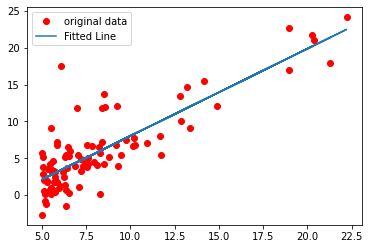

In [19]:
#graphic display
plt.plot(X,Y,'ro',label = 'original data')
plt.plot(X,np.array(W*X+b),label = 'Fitted Line')
plt.legend()
plt.show()